In [19]:
from Bio.PDB.PDBParser import PDBParser
import numpy as np

In [2]:
parser = PDBParser()

In [3]:
structure_id = 'orig_lacz'
filename = 'output/original_lacz_protein_unrelaxed_rank_001_alphafold2_ptm_model_1_seed_000.pdb'
structure = parser.get_structure(structure_id, filename)

In [24]:
coords = []
for model in structure:
    for chain in model:
        for residue in chain:
            coords.append(residue.center_of_mass())
coords = np.array(coords)

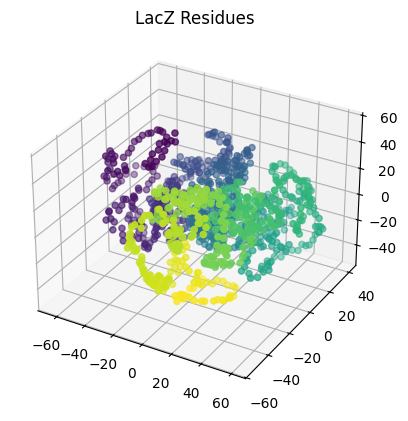

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

colors = np.linspace(0, 1, len(coords))
x, y, z = coords.T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=colors, cmap='viridis', marker='o')
ax.set_title('LacZ Residues')

plt.show()

(100, 3)


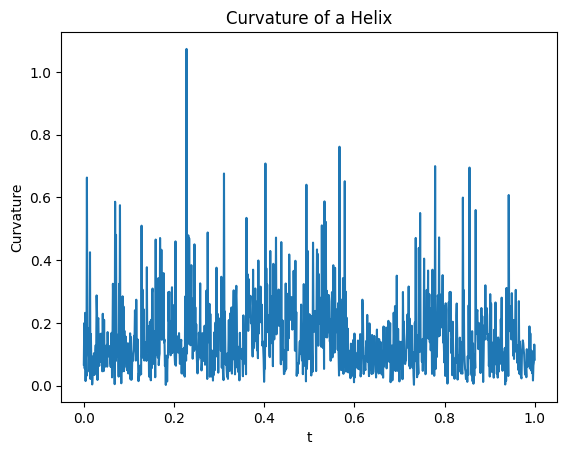

In [ ]:
import numpy as np

# Function to calculate curvature
def calculate_curvature(points):
    """
    Calculate the curvature of a 3D curve from a set of points.
    
    Parameters:
        points (ndarray): Array of shape (n, 3) representing n points in 3D space.
    
    Returns:
        curvatures (ndarray): Array of curvatures at each point.
    """
    points = np.asarray(points)
    
    # Compute first and second derivatives using central differences
    velocities = np.gradient(points, axis=0)  # First derivative (velocity)
    accelerations = np.gradient(velocities, axis=0)  # Second derivative (acceleration)
    
    # Compute cross product of velocity and acceleration
    cross_product = np.cross(velocities, accelerations)
    
    # Compute norms
    norm_velocities = np.linalg.norm(velocities, axis=1)
    norm_cross = np.linalg.norm(cross_product, axis=1)
    
    # Avoid division by zero
    norm_velocities[norm_velocities == 0] = np.nan
    
    # Compute curvature
    curvatures = norm_cross / (norm_velocities ** 3)
    
    return curvatures

curvatures = calculate_curvature(coords)

# Display results
import matplotlib.pyplot as plt
plt.plot(np.linspace(0, 1, len(coords)), curvatures)
plt.title("Curvature of a Helix")
plt.xlabel("t")
plt.ylabel("Curvature")
plt.show()